## **Importing Independences**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zollycitraprayogi/food-ingredients-image")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/food-ingredients-image


In [2]:
# Sistem & Manajemen File
import os
import shutil

# Manipulasi Data
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')

# Deep Learning & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import (
    Input, Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization,
    Flatten, GlobalAveragePooling2D
)
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers

# Image Processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Callbacks
from tensorflow.keras.callbacks import (
    EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
)

# Pre-trained Models
from tensorflow.keras.applications import VGG16, MobileNetV2, EfficientNetB1, EfficientNetB2

# Evaluation Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# IPython Display
from IPython.display import display, HTML

# PIL (Image Processing)
from PIL import Image


2025-06-06 05:38:51.762352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749188332.025017      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749188332.101131      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## **Creating a base directory**

In [3]:
# --- Bagian 1: Definisi Data yang Dipilih dan Persiapan Direktori ---
print("--- Memulai Proses Augmentasi dan Persiapan Dataset ---")

# Path dataset asli
base_dir = '/kaggle/input/food-ingredients-image/Bahan'

# Direktori baru untuk menyimpan hanya salinan data asli yang dipilih
data_select_dir = '/kaggle/working/food-ingredients-image/Data_Select'

# Direktori baru untuk menyimpan hanya gambar hasil augmentasi
augmented_data_dir = '/kaggle/working/food-ingredients-image/Data_Augmented/'

# Definisi kelas dan jumlah gambar asli (ini akan digunakan untuk seleksi)
selected_classes_initial = {
    'Bawang Bombai',
    'Bawang Putih',
    'Ikan',
    'Jagung',
    'Jahe',
    'Kacang Hijau',
    'Kembang Kol',
    'Kentang',
    'Kikil',
    'Kol',
    'Labu Siam',
    'Nasi',
    'Petai',
    'Sawi',
    'Seledri',
    'Telur Ayam',
    'Telur Bebek',
    'Timun',
    'Tomat',
    'Usus',
    'Wortel',
    # data under 150:
    'Bawang Merah',
    'Brokoli',
    'Cabai Hijau',
    'Cabai Merah',
    'Daging Sapi',
    'Daging Unggas',
    'Jamur',
    'Kacang Merah',
    'Kacang Panjang',
    'Kacang Tanah',
    'Mie',
    'Selada',
    'Tempe',
    'Terong'
}

# Target jumlah gambar per kelas setelah augmentasi (total dari Data_Select + Data_Augmented)
TARGET_IMAGES_PER_CLASS = 500

# Hapus direktori 'Data_Select', 'Data_Augmented', dan 'split' jika sudah ada
if os.path.exists(data_select_dir):
    shutil.rmtree(data_select_dir)
os.makedirs(data_select_dir, exist_ok=True)

if os.path.exists(augmented_data_dir):
    shutil.rmtree(augmented_data_dir)
os.makedirs(augmented_data_dir, exist_ok=True)

# Fungsi untuk menghitung jumlah gambar per kelas
def count_images_per_class(data_dir):
    class_counts = {}
    if not os.path.exists(data_dir):
        return {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

--- Memulai Proses Augmentasi dan Persiapan Dataset ---


## Menyalin Data


--- Menyalin Data Asli yang Dipilih ke 'Data_Select' ---
Menyalin kelas 'Jahe' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Mie' ke '/kaggle/working/food-ingredients-image/Data_Select'.


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Menyalin kelas 'Ikan' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Selada' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Telur Bebek' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Brokoli' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Kentang' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Kacang Panjang' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Seledri' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Cabai Merah' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Labu Siam' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Bawang Putih' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Wortel' ke '/kaggle/working/food-ingredients-image/Data_Select'.
Menyalin kelas 'Petai' ke '/kaggle/working/food-ingredients-image/Data_Select'.
M

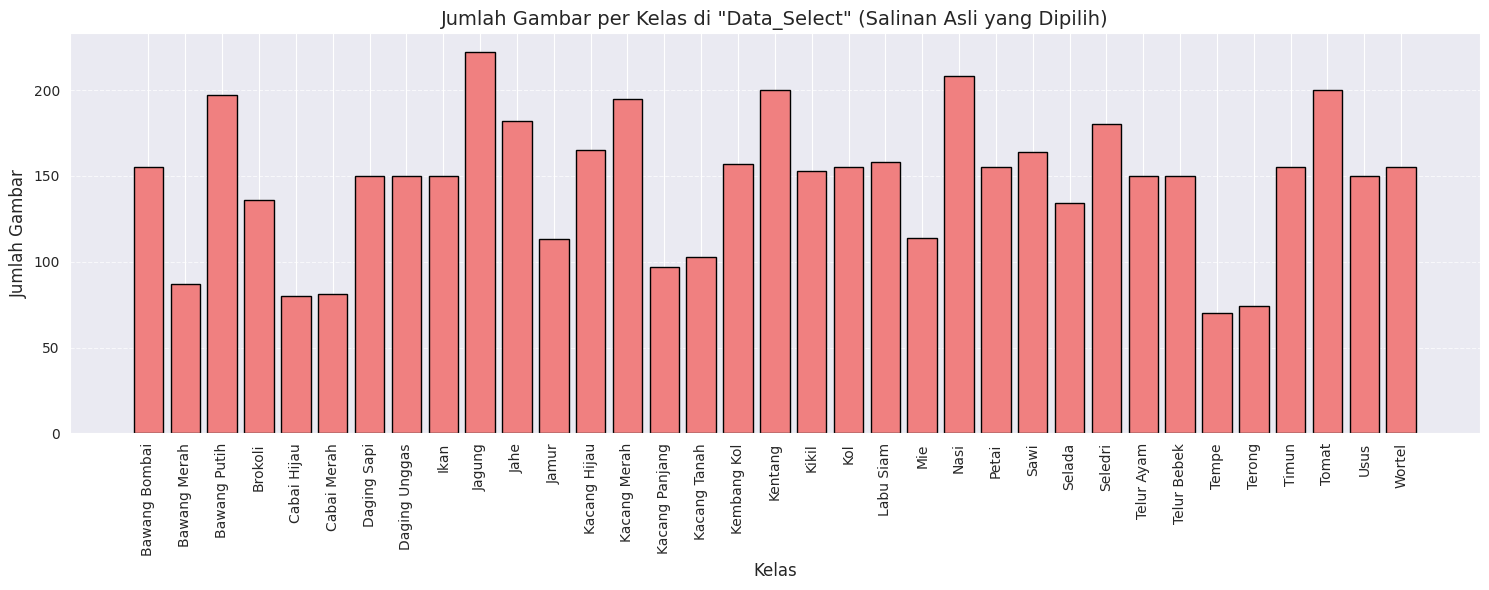

In [4]:
# --- Bagian 2: Menyalin Data Asli yang Dipilih ke 'Data_Select' ---
print("\n--- Menyalin Data Asli yang Dipilih ke 'Data_Select' ---")
corrupted_files_copy = []

for class_name in selected_classes_initial:
    original_class_path = os.path.join(base_dir, class_name)
    target_class_path = os.path.join(data_select_dir, class_name)
    os.makedirs(target_class_path, exist_ok=True)

    print(f"Menyalin kelas '{class_name}' ke '{data_select_dir}'.")
    for img_name in os.listdir(original_class_path):
        src_path = os.path.join(original_class_path, img_name)
        try:
            img = Image.open(src_path).convert('RGB')
            dst_path = os.path.join(target_class_path, img_name)
            img.save(dst_path)
        except (OSError, IOError, Image.UnidentifiedImageError) as e:
            print(f"Error processing {src_path} during copy: {e}")
            corrupted_files_copy.append(src_path)
            continue

if corrupted_files_copy:
    print("\nFile bermasalah saat penyalinan (tidak disalin):")
    for file in corrupted_files_copy:
        print(file)

print("\nPenyalinan data asli ke 'Data_Select' selesai.")

# Hitung jumlah gambar di Data_Select setelah penyalinan
class_counts_in_data_select = count_images_per_class(data_select_dir)
print("\n--- Jumlah Gambar di 'Data_Select' (Salinan Asli) ---")
print(class_counts_in_data_select)

# Siapkan data untuk visualisasi: Grafik batang jumlah gambar asli di Data_Select
all_classes_in_data_select = sorted(class_counts_in_data_select.keys())
values_in_data_select = [class_counts_in_data_select.get(cls, 0) for cls in all_classes_in_data_select]

plt.figure(figsize=(15, 6))
plt.bar(all_classes_in_data_select, values_in_data_select, color='lightcoral', edgecolor='black')
plt.title('Jumlah Gambar per Kelas di "Data_Select" (Salinan Asli yang Dipilih)', fontsize=14)
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah Gambar', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **Image visualization from Dataset**

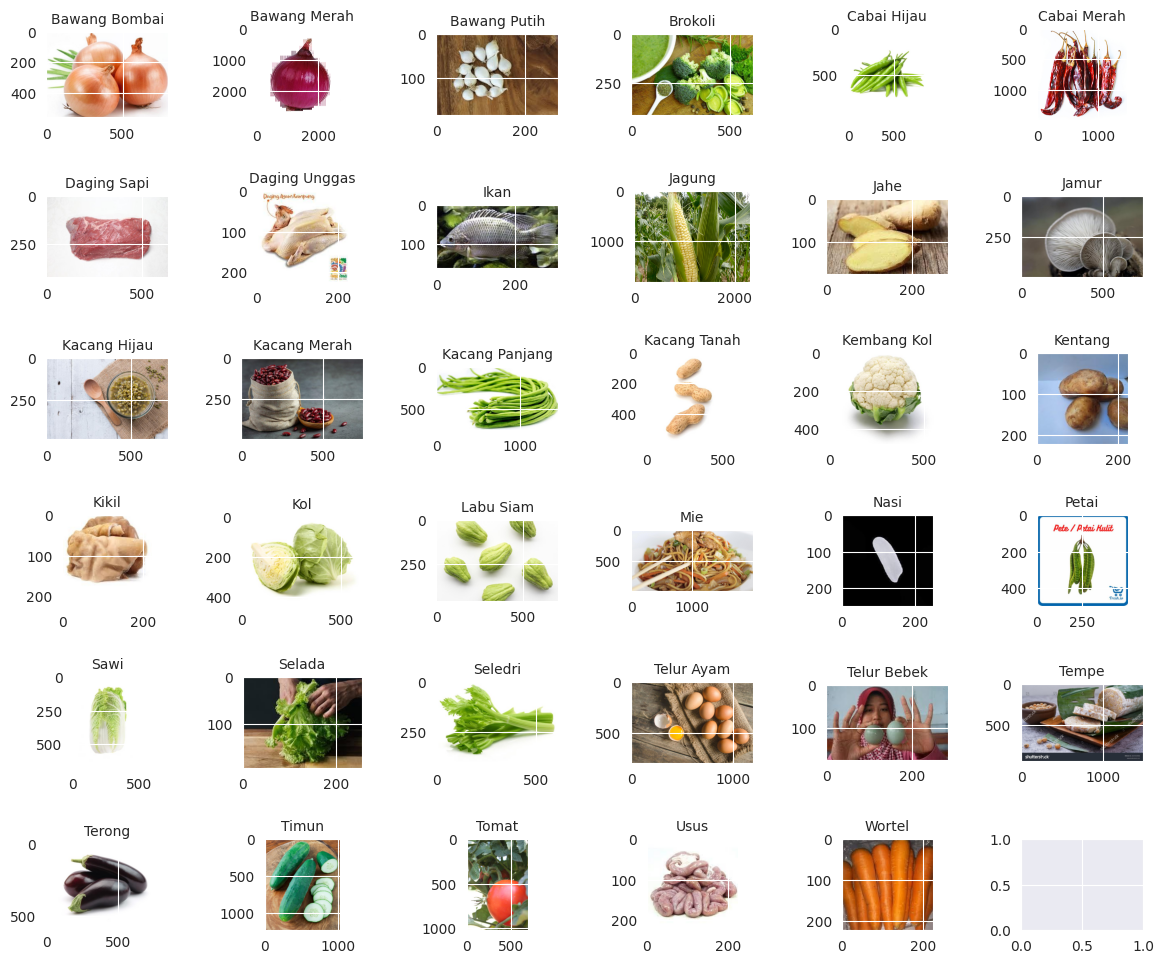

In [5]:
categories = sorted(os.listdir(data_select_dir))

# Initialize list for sample images
sample_images = []
for category in categories:
    category_path = os.path.join(data_select_dir, category)
    first_image = os.listdir(category_path)[0]
    sample_images.append(os.path.join(category_path, first_image))

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(12, 10))

for ax, img_path, label in zip(axes.flat, sample_images, categories):
    ax.imshow(plt.imread(img_path))  # Display the image
    ax.set_title(label, fontsize=10)  # title for each image

plt.tight_layout(pad=2)
plt.show()

## **Augmentasi Data**

In [6]:
# --- Bagian 3: Melakukan Augmentasi dan Menyimpan ke 'Data_Augmented' ---
print("\n--- Memulai Proses Augmentasi dan Menyimpan ke 'Data_Augmented' ---")

# Fungsi augmentasi menggunakan TensorFlow
def augment_image(image):
    # Resize ke ukuran tetap
    image = tf.image.resize(image, [256, 256])

    # Flip horizontal dan vertical
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    # Random brightness
    image = tf.image.random_brightness(image, max_delta=0.2)

    # Random contrast
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    # Random hue dan saturation
    image = tf.image.random_hue(image, max_delta=0.05)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)

    # Crop acak lalu resize kembali (efek zoom)
    image = tf.image.random_crop(image, size=[224, 224, 3])
    image = tf.image.resize(image, [224, 224])

    # Translasi (shifting)
    def translate(image):
        dx = tf.random.uniform([], -20, 20, dtype=tf.int32)
        dy = tf.random.uniform([], -20, 20, dtype=tf.int32)
        return tf.roll(image, shift=[dy, dx], axis=[0, 1])
    image = translate(image)

    # Clipping untuk menjaga nilai pixel valid
    image = tf.clip_by_value(image, 0.0, 255.0)

    # Konversi ke uint8
    return tf.cast(image, tf.uint8).numpy()

corrupted_files_augmentation = []

for class_name, original_count in class_counts_in_data_select.items():
    source_class_path = os.path.join(data_select_dir, class_name)
    target_augmented_class_path = os.path.join(augmented_data_dir, class_name)
    os.makedirs(target_augmented_class_path, exist_ok=True) # Pastikan folder kelas di Data_Augmented ada

    num_to_augment = TARGET_IMAGES_PER_CLASS - original_count
    
    if num_to_augment > 0:
        print(f"Mengaugmentasi kelas '{class_name}'. Target Total: {TARGET_IMAGES_PER_CLASS} gambar. Asli: {original_count}. Perlu Augmentasi: {num_to_augment} gambar.")
        
        images_for_augmentation = [os.path.join(source_class_path, img) for img in os.listdir(source_class_path) if not img.startswith('aug_')]
        
        if not images_for_augmentation:
            print(f"Peringatan: Tidak ada gambar asli yang valid di kelas '{class_name}' di Data_Select untuk di-augmentasi.")
            continue

        # Menentukan berapa kali setiap gambar asli perlu di-augmentasi untuk mencapai total
        # Pastikan kita tidak membuat lebih dari yang dibutuhkan
        augmentation_factor = np.ceil(num_to_augment / len(images_for_augmentation)).astype(int)
        
        aug_idx = 0 # Untuk penomoran gambar augmentasi yang unik
        for img_path in images_for_augmentation:
            if aug_idx >= num_to_augment: # Berhenti jika target augmentasi sudah tercapai
                break
            try:
                img = Image.open(img_path).convert('RGB')
                img_array = np.array(img)
                
                for i in range(augmentation_factor):
                    if aug_idx >= num_to_augment: # Berhenti jika target augmentasi sudah tercapai
                        break
                    augmented_img = augment_image(img_array)
                    augmented_img_pil = Image.fromarray(augmented_img)
                    
                    original_img_name = os.path.basename(img_path)
                    augmented_img_pil.save(os.path.join(target_augmented_class_path, f'aug_{aug_idx}_{original_img_name}'))
                    aug_idx += 1
            except (OSError, IOError, Image.UnidentifiedImageError) as e:
                print(f"Error processing {img_path} for augmentation in {class_name}: {e}")
                corrupted_files_augmentation.append(img_path)
                continue
    else:
        print(f"Kelas '{class_name}' sudah memiliki {original_count} gambar asli (>= target). Tidak perlu augmentasi tambahan.")

if corrupted_files_augmentation:
    print("\nFile bermasalah saat augmentasi (tidak diproses):")
    for file in corrupted_files_augmentation:
        print(file)

print("\nProses augmentasi selesai. Gambar asli di 'Data_Select', gambar augmentasi di 'Data_Augmented'.")



--- Memulai Proses Augmentasi dan Menyimpan ke 'Data_Augmented' ---
Mengaugmentasi kelas 'Tempe'. Target Total: 500 gambar. Asli: 70. Perlu Augmentasi: 430 gambar.


I0000 00:00:1749188486.649673      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Mengaugmentasi kelas 'Jamur'. Target Total: 500 gambar. Asli: 113. Perlu Augmentasi: 387 gambar.
Mengaugmentasi kelas 'Petai'. Target Total: 500 gambar. Asli: 155. Perlu Augmentasi: 345 gambar.
Mengaugmentasi kelas 'Wortel'. Target Total: 500 gambar. Asli: 155. Perlu Augmentasi: 345 gambar.
Mengaugmentasi kelas 'Terong'. Target Total: 500 gambar. Asli: 74. Perlu Augmentasi: 426 gambar.
Mengaugmentasi kelas 'Kentang'. Target Total: 500 gambar. Asli: 200. Perlu Augmentasi: 300 gambar.
Mengaugmentasi kelas 'Brokoli'. Target Total: 500 gambar. Asli: 136. Perlu Augmentasi: 364 gambar.
Mengaugmentasi kelas 'Ikan'. Target Total: 500 gambar. Asli: 150. Perlu Augmentasi: 350 gambar.
Mengaugmentasi kelas 'Tomat'. Target Total: 500 gambar. Asli: 200. Perlu Augmentasi: 300 gambar.
Mengaugmentasi kelas 'Telur Bebek'. Target Total: 500 gambar. Asli: 150. Perlu Augmentasi: 350 gambar.
Mengaugmentasi kelas 'Bawang Bombai'. Target Total: 500 gambar. Asli: 155. Perlu Augmentasi: 345 gambar.
Mengaugmenta

## **Cek Hasil Augmentasi**


--- Memulai Proses Penggabungan Data ke 'data_final' ---

--- Proses penggabungan selesai. Semua gambar berada di 'data_final'. ---

--- Jumlah Gambar per Kelas di 'data_final' (Gabungan) ---
{'Tempe': 500, 'Jamur': 500, 'Petai': 500, 'Wortel': 500, 'Terong': 500, 'Kentang': 500, 'Brokoli': 500, 'Ikan': 500, 'Tomat': 500, 'Telur Bebek': 500, 'Bawang Bombai': 500, 'Bawang Putih': 500, 'Cabai Hijau': 500, 'Daging Sapi': 500, 'Telur Ayam': 500, 'Seledri': 500, 'Selada': 500, 'Kembang Kol': 500, 'Daging Unggas': 500, 'Sawi': 500, 'Jahe': 500, 'Kacang Panjang': 500, 'Labu Siam': 500, 'Cabai Merah': 500, 'Kacang Hijau': 500, 'Kacang Merah': 500, 'Kikil': 500, 'Mie': 500, 'Kol': 500, 'Jagung': 500, 'Kacang Tanah': 500, 'Usus': 500, 'Nasi': 500, 'Bawang Merah': 500, 'Timun': 500}


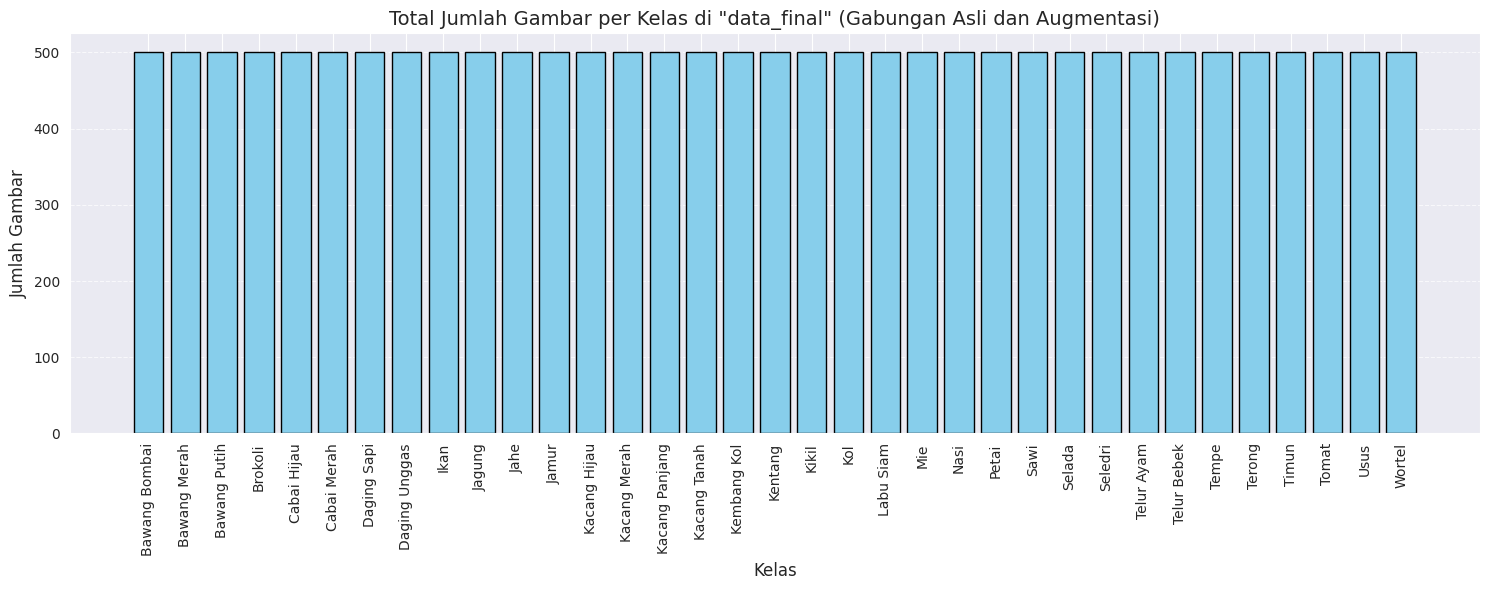

In [7]:
# --- Bagian 4: Menggabungkan Data Asli dan Augmentasi ke Direktori 'data_final' ---
print("\n--- Memulai Proses Penggabungan Data ke 'data_final' ---")

final_data_dir = '/kaggle/working/food-ingredients-image/data_final'

# Hapus direktori data_final jika sudah ada untuk memastikan bersih
if os.path.exists(final_data_dir):
    shutil.rmtree(final_data_dir)
os.makedirs(final_data_dir, exist_ok=True) # Buat direktori data_final

# Fungsi untuk menyalin gambar dari sumber ke tujuan
def copy_images_to_final(source_dir, destination_dir):
    for class_name in os.listdir(source_dir):
        source_class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(source_class_path):
            destination_class_path = os.path.join(destination_dir, class_name)
            os.makedirs(destination_class_path, exist_ok=True) # Pastikan folder kelas di data_final ada

            # print(f"Menyalin gambar dari '{source_class_path}' ke '{destination_class_path}'...")
            for img_name in os.listdir(source_class_path):
                src_path = os.path.join(source_class_path, img_name)
                dst_path = os.path.join(destination_class_path, img_name)
                shutil.copy(src_path, dst_path)
        else:
            print(f"Melewati: {source_class_path} bukan direktori.")

# Salin data dari Data_Select ke data_final
copy_images_to_final(data_select_dir, final_data_dir)

# Salin data dari Data_Augmented ke data_final
copy_images_to_final(augmented_data_dir, final_data_dir)

print("\n--- Proses penggabungan selesai. Semua gambar berada di 'data_final'. ---")

# Verifikasi jumlah gambar di data_final
final_class_counts = count_images_per_class(final_data_dir)
print("\n--- Jumlah Gambar per Kelas di 'data_final' (Gabungan) ---")
print(final_class_counts)

# Visualisasi jumlah gambar di data_final
all_classes_in_final = sorted(final_class_counts.keys())
values_in_final = [final_class_counts.get(cls, 0) for cls in all_classes_in_final]

plt.figure(figsize=(15, 6))
plt.bar(all_classes_in_final, values_in_final, color='skyblue', edgecolor='black')
plt.title('Total Jumlah Gambar per Kelas di "data_final" (Gabungan Asli dan Augmentasi)', fontsize=14)
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah Gambar', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Membagi Dataset Menjadi Train, Test, dan Validation**

In [8]:
"""## **Membagi Dataset Menjadi Train, Test, dan Validation**"""

# Direktori untuk hasil split
split_base_dir = '/kaggle/working/food-ingredients-image/split'
train_dir = os.path.join(split_base_dir, 'train')
val_dir = os.path.join(split_base_dir, 'validation')
test_dir = os.path.join(split_base_dir, 'test')

if os.path.exists(split_base_dir):
    shutil.rmtree(split_base_dir)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [9]:
# --- Bagian 5: Membagi Dataset Menjadi Train, Test, dan Validation dari Data Gabungan (data_final) ---
print("\n--- Memulai Pembagian Dataset (Train, Val, Test) dari 'data_final' ---")

# Kumpulkan semua jalur gambar dan label kelas dari direktori data_final
all_images_paths_for_split = []
all_images_labels_for_split = []

for class_name in os.listdir(final_data_dir):
    class_path = os.path.join(final_data_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            all_images_paths_for_split.append(os.path.join(class_path, img_name))
            all_images_labels_for_split.append(class_name)

# Memisahkan menjadi train_val (80%) dan test (20%)
train_val_images, test_images, train_val_labels, test_labels = train_test_split(
    all_images_paths_for_split, all_images_labels_for_split, test_size=0.2, random_state=42, stratify=all_images_labels_for_split
)

# Pisahkan train (70%) dan val (10%) dari train_val (total 80%)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_val_images, train_val_labels, test_size=0.125, random_state=42, stratify=train_val_labels
)

# Salin ke direktori masing-masing
print("Menyalin gambar ke direktori train, validation, dan test...")
for img_path, label in zip(train_images, train_labels):
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    shutil.copy(img_path, os.path.join(train_dir, label, os.path.basename(img_path)))
for img_path, label in zip(val_images, val_labels):
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    shutil.copy(img_path, os.path.join(val_dir, label, os.path.basename(img_path)))
for img_path, label in zip(test_images, test_labels):
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)
    shutil.copy(img_path, os.path.join(test_dir, label, os.path.basename(img_path)))

print("\nDataset berhasil dibagi menjadi train (70%), validation (10%), dan test (20%).")
print("--- Proses Selesai Seluruhnya ---")


--- Memulai Pembagian Dataset (Train, Val, Test) dari 'data_final' ---
Menyalin gambar ke direktori train, validation, dan test...

Dataset berhasil dibagi menjadi train (70%), validation (10%), dan test (20%).
--- Proses Selesai Seluruhnya ---


In [10]:
# Fungsi untuk menghitung jumlah gambar per kelas
def count_images_per_class(data_dir):
    class_counts = {}
    if not os.path.exists(data_dir):
        return {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_class_counts = count_images_per_class(train_dir)
val_class_counts = count_images_per_class(val_dir)
test_class_counts = count_images_per_class(test_dir)

print("\n--- Jumlah Gambar per Kelas (Train) ---")
print(train_class_counts)
train_total_count = sum(train_class_counts.values())
print(f"Total gambar di Train: {train_total_count}")


print("\n--- Jumlah Gambar per Kelas (Validation) ---")
print(val_class_counts)
val_total_count = sum(val_class_counts.values())
print(f"Total gambar di Validation: {val_total_count}")


print("\n--- Jumlah Gambar per Kelas (Test) ---")
print(test_class_counts)
test_total_count = sum(test_class_counts.values())
print(f"Total gambar di Test: {test_total_count}")


--- Jumlah Gambar per Kelas (Train) ---
{'Tempe': 350, 'Jamur': 350, 'Petai': 350, 'Wortel': 350, 'Terong': 350, 'Kentang': 350, 'Brokoli': 350, 'Ikan': 350, 'Tomat': 350, 'Telur Bebek': 350, 'Bawang Bombai': 350, 'Bawang Putih': 350, 'Cabai Hijau': 350, 'Daging Sapi': 350, 'Telur Ayam': 350, 'Seledri': 350, 'Selada': 350, 'Kembang Kol': 350, 'Daging Unggas': 350, 'Sawi': 350, 'Jahe': 350, 'Kacang Panjang': 350, 'Labu Siam': 350, 'Cabai Merah': 350, 'Kacang Hijau': 350, 'Kacang Merah': 350, 'Kikil': 350, 'Mie': 350, 'Kol': 350, 'Jagung': 350, 'Kacang Tanah': 350, 'Usus': 350, 'Nasi': 350, 'Bawang Merah': 350, 'Timun': 350}
Total gambar di Train: 12250

--- Jumlah Gambar per Kelas (Validation) ---
{'Tempe': 50, 'Jamur': 50, 'Petai': 50, 'Wortel': 50, 'Terong': 50, 'Kentang': 50, 'Brokoli': 50, 'Ikan': 50, 'Tomat': 50, 'Telur Bebek': 50, 'Bawang Bombai': 50, 'Bawang Putih': 50, 'Cabai Hijau': 50, 'Daging Sapi': 50, 'Telur Ayam': 50, 'Seledri': 50, 'Selada': 50, 'Kembang Kol': 50, 'Dagin

## **Pra-Pemrosesan Data Gambar**

In [11]:
# Data augmentation dan normalisasi untuk train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Hanya normalisasi untuk validation dan test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Generator data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 12245 images belonging to 35 classes.
Found 1750 images belonging to 35 classes.
Found 3500 images belonging to 35 classes.


In [12]:
shutil.make_archive('/kaggle/working/food-ingredients-image', 'zip', '/kaggle/working/food-ingredients-image')
print("Data Berhasil Disimpan \n")

Data Berhasil Disimpan 



## **Pembuatan Model CNN**

In [13]:
# # Pre-trained model dengan custom CNN
# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(35, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# model.summary()

## **Train Model**

In [14]:
# # Dir Simpan model 
# model_sequential_dir = '/kaggle/working/convert_model_sequential' 
# os.makedirs(model_sequential_dir, exist_ok=True)

In [15]:
# callbacks = [
#     EarlyStopping(patience=5, restore_best_weights=True),
#     ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=1e-5),
#     ModelCheckpoint('/kaggle/working/convert_model_sequential/best_model_sequential.h5', save_best_only=True)
# ]

# history1 = model.fit(
#     train_generator,
#     epochs=40,
#     validation_data=val_generator,
#     callbacks=callbacks
# )

In [16]:
# # Evaluasi pada test set
# test_loss, test_accuracy = model.evaluate(test_generator)
# print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

# # Plot training history
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history1.history['accuracy'], label='Train Accuracy')
# plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history1.history['loss'], label='Train Loss')
# plt.plot(history1.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.legend()
# plt.show()

In [17]:
# # Simpan model .h5
# model.save(os.path.join(model_sequential_dir, 'final_sequential_model.h5')) 

# # Simpan model ke format SavedModel
# tf.saved_model.save(model_sequential, os.path.join(model_sequential_dir, 'SavedModel')) 
# print("Model disimpan dengan format SavedModel!")

# # konversi ke TFLite
# converter_sequential = tf.lite.TFLiteConverter.from_saved_model(os.path.join(model_sequential_dir, 'SavedModel')) 
# tflite_model_sequential = converter_sequential.convert()

# # menyimpan file TFLite
# with open(os.path.join(model_sequential_dir, 'model_sequential.tflite'), 'wb') as f: 
#     f.write(tflite_model_sequential)

# print("Model dikonversi dan disimpan dengan format TF-Lite!")

# # Buat arsip zip
# shutil.make_archive(model_sequential_dir, 'zip', model_sequential_dir)

## **Menggunakan MobileNetV2**

In [18]:
# Jumlah kelas (35 kelas)
num_classes = len(train_generator.class_indices)

# Muat model
base_model = MobileNetV2(include_top=False, weights="imagenet", input_tensor=Input(shape=(224, 224, 3))) 

# Bekukan lapisan base model
base_model.trainable = False

# Membangun model baru di atas base model
model_mobilenetv2 = Sequential([ 
    base_model, # Menambahkan base model MobileNetV2
    GlobalAveragePooling2D(), # GlobalAveragePooling2D untuk mengurangi dimensi fitur
    Dense(128, activation='relu'), # Lapisan Dense tambahan
    Dropout(0.3), # Dropout untuk regularisasi
    Dense(num_classes, activation='softmax') # Lapisan output sesuai jumlah kelas 
])

# Compile model
model_mobilenetv2.compile(optimizer=Adam(learning_rate=0.0001), 
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

model_mobilenetv2.summary()

/tmp/ipykernel_19/1709376777.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights="imagenet", input_tensor=Input(shape=(224, 224, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,426,467 (9.26 MB)

 Trainable params: 168,483 (658.14 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### **Train Model dengan MobileNetV2 (Transfer Learning)**


In [19]:
# Callbacks 
callbacks_mobilenetv2 = [ 
    EarlyStopping(patience=7, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(monitor='val_accuracy', patience=4, factor=0.5, min_lr=1e-6),
    ModelCheckpoint('best_mobilenetv2_model.h5', save_best_only=True, monitor='val_accuracy') 
]

# Latih model MobileNetV2
history_mobilenetv2 = model_mobilenetv2.fit( 
    train_generator,
    epochs=35, 
    validation_data=val_generator,
    callbacks=callbacks_mobilenetv2
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
I0000 00:00:1749188757.581718      62 service.cc:148] XLA service 0x7c9550002fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749188757.582720      62 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749188758.516484      62 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/383 ━━━━━━━━━━━━━━━━━━━━ 1:16:09 12s/step - accuracy: 0.0000e+00 - loss: 3.9172

I0000 00:00:1749188762.698970      62 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


383/383 ━━━━━━━━━━━━━━━━━━━━ 156s 377ms/step - accuracy: 0.1469 - loss: 3.3337 - val_accuracy: 0.7080 - val_loss: 1.4630 - learning_rate: 1.0000e-04
Epoch 2/35
383/383 ━━━━━━━━━━━━━━━━━━━━ 135s 351ms/step - accuracy: 0.5993 - loss: 1.5316 - val_accuracy: 0.8423 - val_loss: 0.7556 - learning_rate: 1.0000e-04
Epoch 3/35
383/383 ━━━━━━━━━━━━━━━━━━━━ 136s 355ms/step - accuracy: 0.7384 - loss: 0.9869 - val_accuracy: 0.8709 - val_loss: 0.5483 - learning_rate: 1.0000e-04
Epoch 4/35
383/383 ━━━━━━━━━━━━━━━━━━━━ 136s 356ms/step - accuracy: 0.7879 - loss: 0.7749 - val_accuracy: 0.8811 - val_loss: 0.4545 - learning_rate: 1.0000e-04
Epoch 5/35
383/383 ━━━━━━━━━━━━━━━━━━━━ 139s 363ms/step - accuracy: 0.8130 - loss: 0.6623 - val_accuracy: 0.9017 - val_loss: 0.3910 - learning_rate: 1.0000e-04
Epoch 6/35
383/383 ━━━━━━━━━━━━━━━━━━━━ 135s 352ms/step - accuracy: 0.8386 - loss: 0.5613 - val_accuracy: 0.9034 - val_loss: 0.3501 - learning_rate: 1.0000e-04
Epoch 7/35
383/383 ━━━━━━━━━━━━━━━━━━━━ 135s 352ms/

### **Evaluasi**

In [20]:
# Evaluasi pada test set
test_loss_mobilenetv2, test_accuracy_mobilenetv2 = model_mobilenetv2.evaluate(test_generator) 
print(f"MobileNetV2 Test accuracy: {test_accuracy_mobilenetv2:.4f}, Test loss: {test_loss_mobilenetv2:.4f}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9656 - loss: 0.1094
MobileNetV2 Test accuracy: 0.9594, Test loss: 0.1309


### **Visualisasi**

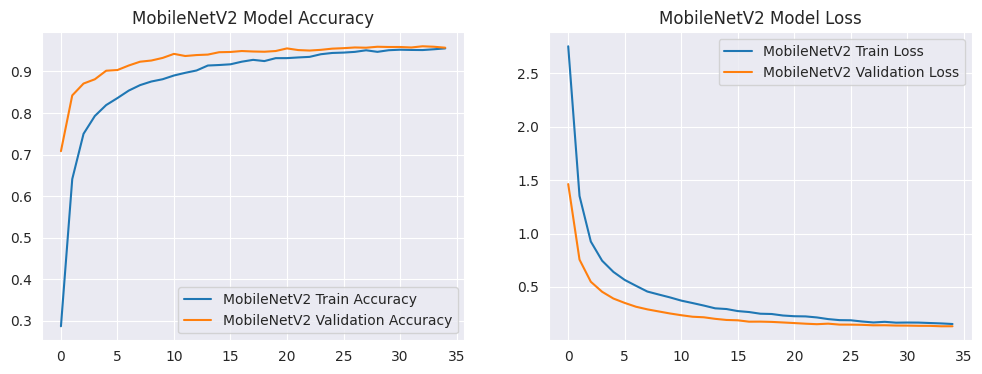

In [21]:
# Plot training history MobileNetV2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobilenetv2.history['accuracy'], label='MobileNetV2 Train Accuracy') 
plt.plot(history_mobilenetv2.history['val_accuracy'], label='MobileNetV2 Validation Accuracy') 
plt.title('MobileNetV2 Model Accuracy') 
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobilenetv2.history['loss'], label='MobileNetV2 Train Loss') 
plt.plot(history_mobilenetv2.history['val_loss'], label='MobileNetV2 Validation Loss') 
plt.title('MobileNetV2 Model Loss') 
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step


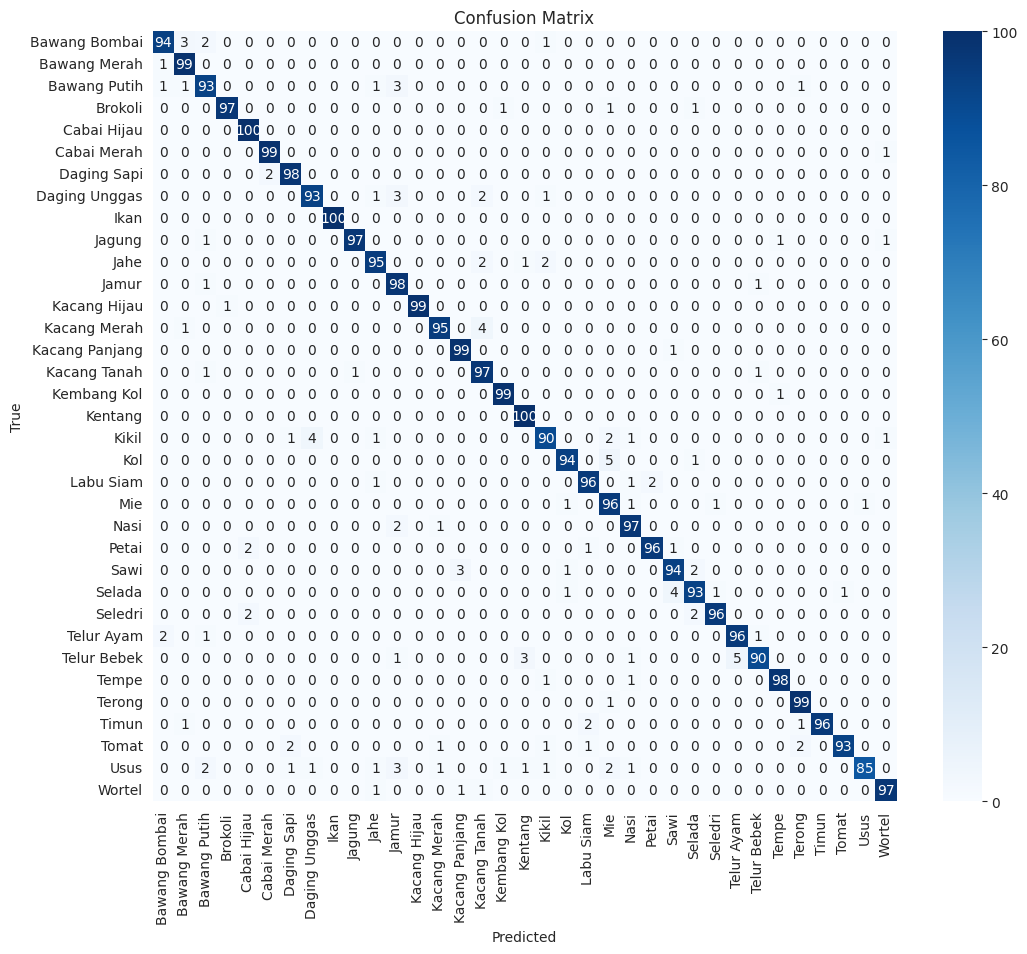

                precision    recall  f1-score   support

 Bawang Bombai       0.96      0.94      0.95       100
  Bawang Merah       0.94      0.99      0.97       100
  Bawang Putih       0.92      0.93      0.93       100
       Brokoli       0.99      0.97      0.98       100
   Cabai Hijau       0.96      1.00      0.98       100
   Cabai Merah       0.98      0.99      0.99       100
   Daging Sapi       0.96      0.98      0.97       100
 Daging Unggas       0.95      0.93      0.94       100
          Ikan       1.00      1.00      1.00       100
        Jagung       0.99      0.97      0.98       100
          Jahe       0.94      0.95      0.95       100
         Jamur       0.89      0.98      0.93       100
  Kacang Hijau       1.00      0.99      0.99       100
  Kacang Merah       0.97      0.95      0.96       100
Kacang Panjang       0.96      0.99      0.98       100
  Kacang Tanah       0.92      0.97      0.94       100
   Kembang Kol       0.98      0.99      0.99  

In [22]:
# Prediksi untuk evaluasi lanjutan
y_pred_probs = model_mobilenetv2.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))


### **Convert Model**

In [23]:
# Model sudah dlatih dan disimpan dalam variabel `Model_MobileNetV2`
model_mobilenetv2_dir = '/kaggle/working/convert_Model_MobileNetV2' 
os.makedirs(model_mobilenetv2_dir, exist_ok=True)

# Simpan model ke .h5
model_h5_path = os.path.join(model_mobilenetv2_dir, 'final_mobilenetv2_model.h5')
model_mobilenetv2.save(model_h5_path)
print("Model disimpan dalam format .h5")

# Simpan model ke format SavedModel
tf.saved_model.save(model_mobilenetv2, os.path.join(model_mobilenetv2_dir, 'SavedModel')) 
print("MobileNetV2 Model disimpan dengan format SavedModel!")

# Konversi ke TFLite dari model Keras langsung (lebih aman)
converter = tf.lite.TFLiteConverter.from_keras_model(model_mobilenetv2)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
converter.experimental_enable_resource_variables = False
tflite_model = converter.convert()
# Simpan hasil TFLite
tflite_path = os.path.join(model_mobilenetv2_dir, 'model_mobilenetv2.tflite')
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)
print("Model berhasil dikonversi ke TFLite dan disimpan!")

# Buat arsip zip
shutil.make_archive(model_mobilenetv2_dir, 'zip', model_mobilenetv2_dir)
print("Direktori model diarsipkan sebagai.zip")


Model disimpan dalam format .h5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


MobileNetV2 Model disimpan dengan format SavedModel!


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


Saved artifact at '/tmp/tmpqrwtie8g'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 35), dtype=tf.float32, name=None)
Captures:
  136982669127376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136982669127760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136982669128912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136982669125840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136982669125456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136982669126224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136982669125264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136982669129296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136982669128336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136982669127952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136982669

W0000 00:00:1749193553.326162      19 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1749193553.326210      19 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1749193553.466518      19 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


Model berhasil dikonversi ke TFLite dan disimpan!
Direktori model diarsipkan sebagai.zip


## **Modifikasi MobileNetV2 dengan Fine-Tuning + Optimisasi Callback**

In [24]:
# Load MobileNetV2 (tanpa top)
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tune 30 layer terakhir
mobilenet_base.trainable = True
for layer in mobilenet_base.layers[:-30]:
    layer.trainable = False

# Membangun model
x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)
model_tuning = Model(inputs=mobilenet_base.input, outputs=output)

# Learning rate schedule (optional)
optimizer = Adam(learning_rate=1e-4)

model_tuning.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_tuning.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,302,819 (8.78 MB)

 Trainable params: 1,571,235 (5.99 MB)

 Non-trainable params: 731,584 (2.79 MB)

### **Train Model**

In [25]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6),
    ModelCheckpoint('best_model_{val_accuracy:.2f}.h5', monitor='val_accuracy', save_best_only=True)
]

history_tuning = model_tuning.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10


E0000 00:00:1749193578.372006      59 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749193578.569129      59 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


142/383 ━━━━━━━━━━━━━━━━━━━━ 1:22 343ms/step - accuracy: 0.2317 - loss: 3.0635

E0000 00:00:1749193632.639271      60 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749193632.840832      60 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


383/383 ━━━━━━━━━━━━━━━━━━━━ 163s 377ms/step - accuracy: 0.4442 - loss: 2.1729 - val_accuracy: 0.8560 - val_loss: 0.4730 - learning_rate: 1.0000e-04
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 136s 354ms/step - accuracy: 0.8781 - loss: 0.4178 - val_accuracy: 0.9303 - val_loss: 0.2191 - learning_rate: 1.0000e-04
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 133s 348ms/step - accuracy: 0.9333 - loss: 0.2298 - val_accuracy: 0.9537 - val_loss: 0.1574 - learning_rate: 1.0000e-04
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 133s 346ms/step - accuracy: 0.9545 - loss: 0.1519 - val_accuracy: 0.9657 - val_loss: 0.1213 - learning_rate: 1.0000e-04
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 133s 348ms/step - accuracy: 0.9695 - loss: 0.1106 - val_accuracy: 0.9686 - val_loss: 0.0946 - learning_rate: 1.0000e-04
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 133s 348ms/step - accuracy: 0.9743 - loss: 0.0886 - val_accuracy: 0.9766 - val_loss: 0.0730 - learning_rate: 1.0000e-04
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 133s 348ms/

### **Evaluasi**

In [26]:
# Evaluasi
test_loss, test_accuracy = model_tuning.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.9896 - loss: 0.0502
Test accuracy: 0.9857, Test loss: 0.0510


### **Visualisasi**

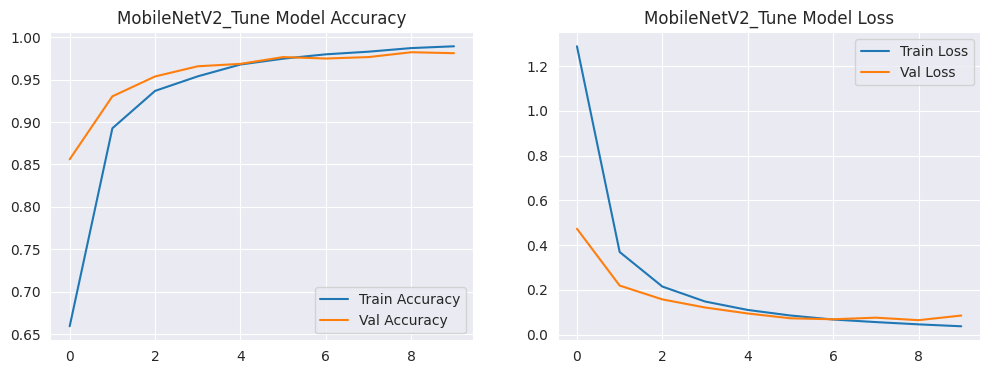

In [27]:
# Plot training history MobileNetV2_Tune
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_tuning.history['accuracy'], label='Train Accuracy') 
plt.plot(history_tuning.history['val_accuracy'], label='Val Accuracy') 
plt.title('MobileNetV2_Tune Model Accuracy') 
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_tuning.history['loss'], label='Train Loss') 
plt.plot(history_tuning.history['val_loss'], label='Val Loss') 
plt.title('MobileNetV2_Tune Model Loss') 
plt.legend()
plt.show()

110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step


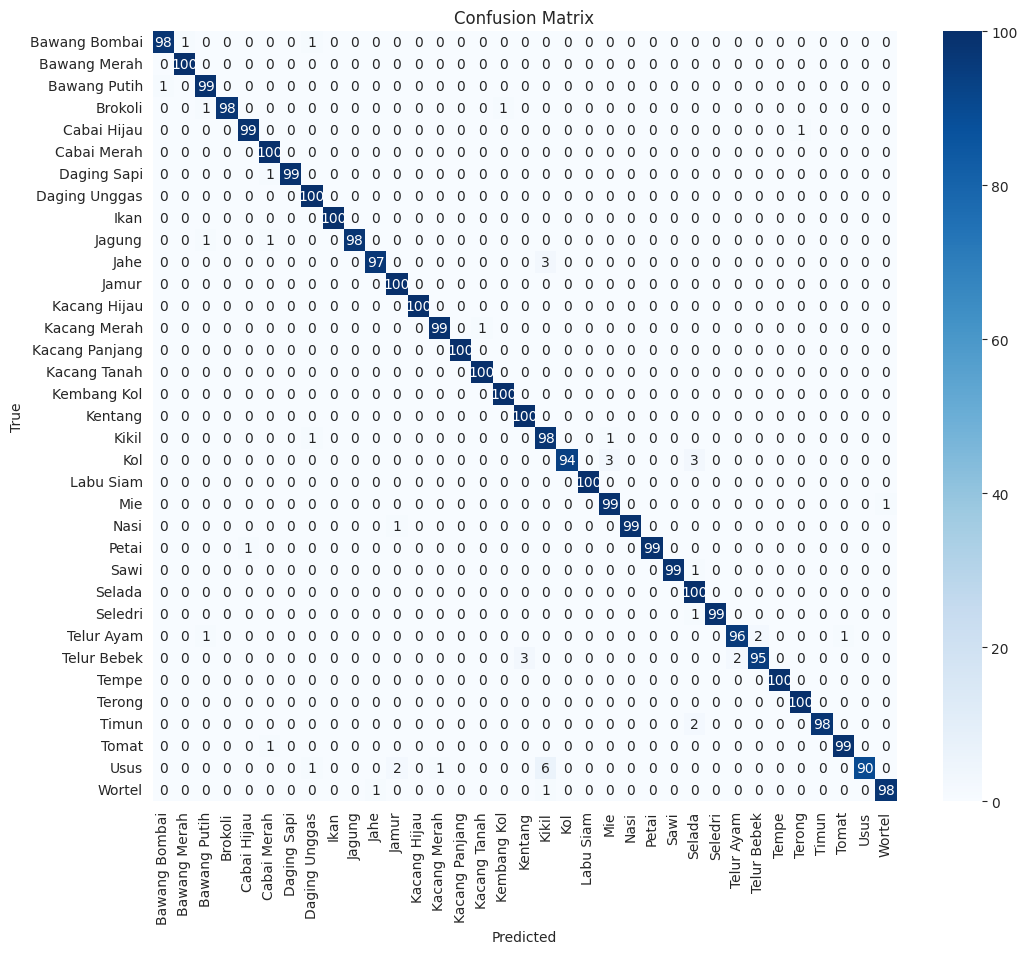

                precision    recall  f1-score   support

 Bawang Bombai       0.99      0.98      0.98       100
  Bawang Merah       0.99      1.00      1.00       100
  Bawang Putih       0.97      0.99      0.98       100
       Brokoli       1.00      0.98      0.99       100
   Cabai Hijau       0.99      0.99      0.99       100
   Cabai Merah       0.97      1.00      0.99       100
   Daging Sapi       1.00      0.99      0.99       100
 Daging Unggas       0.97      1.00      0.99       100
          Ikan       1.00      1.00      1.00       100
        Jagung       1.00      0.98      0.99       100
          Jahe       0.99      0.97      0.98       100
         Jamur       0.97      1.00      0.99       100
  Kacang Hijau       1.00      1.00      1.00       100
  Kacang Merah       0.99      0.99      0.99       100
Kacang Panjang       1.00      1.00      1.00       100
  Kacang Tanah       0.99      1.00      1.00       100
   Kembang Kol       0.99      1.00      1.00  

In [28]:
# Prediksi untuk evaluasi lanjutan
y_pred_probs = model_tuning.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))


In [29]:
# model sudah dilatih dan disimpan dalam variabel `model_tune`
model_tuning_dir = '/kaggle/working/convert_model_tuning' 
os.makedirs(model_tuning_dir, exist_ok=True)

# Simpan model ke .h5
model_h5_path = os.path.join(model_tuning_dir, 'final_model_tune.h5')
model_tuning.save(model_h5_path)
print("Model disimpan dalam format .h5")

# Simpan model ke format SavedModel
tf.saved_model.save(model_tuning, os.path.join(model_tuning_dir, 'SavedModel')) 
print("Model disimpan dengan format SavedModel!")

# Konversi ke TFLite dari model Keras langsung (lebih aman)
converter = tf.lite.TFLiteConverter.from_keras_model(model_tuning)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
converter.experimental_enable_resource_variables = False
tflite_model = converter.convert()
# Simpan hasil TFLite
tflite_path = os.path.join(model_tuning_dir, 'model_tune.tflite')
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)
print("Model berhasil dikonversi ke TFLite dan disimpan!")

# Buat arsip zip
shutil.make_archive(model_tuning_dir, 'zip', model_tuning_dir)
print("Direktori model diarsipkan sebagai .zip")


Model disimpan dalam format .h5
Model disimpan dengan format SavedModel!
Saved artifact at '/tmp/tmp4067jc1x'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_160')
Output Type:
  TensorSpec(shape=(None, 35), dtype=tf.float32, name=None)
Captures:
  136980482930640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136979492240080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136979492239696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136979492239888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136979492239504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136979492238352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136979492238160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136979492237776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136979492237968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136979

W0000 00:00:1749194991.891379      19 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1749194991.891412      19 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


Model berhasil dikonversi ke TFLite dan disimpan!
Direktori model diarsipkan sebagai .zip
